In [16]:
import sqlite3
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [17]:
import geopandas as gpd
import pandas as pd
import sqlalchemy 
import getpass
import seaborn as sns
import matplotlib.pyplot as plt

você pode ver [aqui](https://dados.gov.br/dataset/cgeo_vw_per_pessate1ano/resource/773f70e4-f8f1-4a1a-b09b-ac9aeaec0db6?inner_span=True) o site em que pegamos o arquivo .json com os dados

selecionando apenas as colunas que nos interessam

In [25]:
gpd_pessoas1 = gpd.read_file("vw_per_pessate1ano.json")
print(type(gpd_pessoas1))
gpd_pessoas1.head(2)

AttributeError: module 'geopandas' has no attribute 'read_file'

In [24]:
gpd_pessoas1 = gpd_pessoas1[['gid','UF','nome','Censo','POP_TOT','PESSate1ano','PER_PESSate1ano','classe','geom']]
gpd_pessoas1.head(2)

NameError: name 'gpd_pessoas1' is not defined

Transformando em dataframe pandas

In [26]:
pd_pessoas1 = pd.DataFrame(gpd_pessoas1)
print(type(pd_pessoas1))

NameError: name 'gpd_pessoas1' is not defined

In [27]:
#transformando em string
pd_pessoas1['geom']= pd_pessoas1['geom'].astype(str)

NameError: name 'pd_pessoas1' is not defined

In [28]:
conn = sqlite3.connect(os.path.join('bancoA2.db'))

In [30]:
cur = conn.cursor()
cur.execute('''CREATE TABLE IF NOT EXISTS pessoas1
             ('gid' INT PRIMARY KEY NOT NULL,
             'UF' text,
             'nome' text,
             'Censo' FLOAT,
             'POP_TOT' FLOAT,
             'PESSate1ano' FLOAT,
             'PER_PESSate1ano' FLOAT,
             'classe' FLOAT,
             'geom' text)''')
conn.commit()

#adicionando os dados na tabela criada
pd_pessoas1.to_sql('pessoas1', con=conn, if_exists='replace')
conn.commit()

NameError: name 'pd_pessoas1' is not defined

In [ ]:
#fechando a conexão
conn.close()

# Importando o banco

In [ ]:
conn = sqlite3.connect(os.path.join('bancoA2.db'))
query= "SELECT * FROM pessoas1"
pessoas1_df = pd.read_sql(query,conn)
pessoas1 = pessoas1_df.copy()
pessoas1_df.head(2)

In [ ]:
#fechar a conexão

conn.close()

# análise com geopandas

In [ ]:
#tranformar para geodataframe

pessoas1['geom']=gpd.GeoSeries.from_wkt(pib_df['geom'])
pessoas1 = gpd.GeoDataFrame(pessoas1, geometry='geom')
pessoas1.head(2)

In [32]:
merge['PER_PESSate1ano'] = merge['PER_PESSate1ano'].astype(float)
merge['POP_TOT'] = merge['POP_TOT'].astype(float)
merge['UF'] = merge['UF'].astype(str)

NameError: name 'merge' is not defined

NameError: name 'merge' is not defined

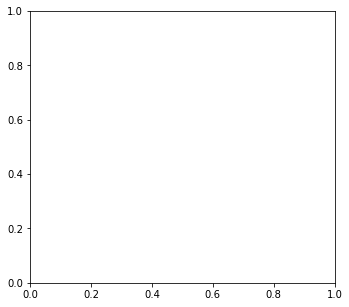

In [31]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
merge.plot(column='PER_PESSate1ano', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "Percentual de pessoas de até 1 ano de idade sem registro de nascimento ", 'shrink': 0.7})
plt.title('Percentual de pessoas de até 1 ano de idade sem registro de nascimento  por município do Brasil') 

ax=f.add_subplot(122)
merge.plot(column='POP_TOT', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município do Brasil')

In [33]:
merge[['PER_PESSate1ano', 'POP_TOT', 'PESSate1ano']].agg(['median', 'mean'])

NameError: name 'merge' is not defined

fazer a mesma coisa por região para melhor visualização

In [35]:
norte = merge[merge['UF'] == 'ACRE','AMAZONAS','RORAIMA','RONDÔNIA','PARÁ','AMAPÁ','TOCANTINS']
nordeste = merge[merge['UF'] == 'MARANHÃO','PIAUÍ','BAHIA','CEARÁ','RIO GRANDE DO NORTE','PARAÍBA','PERNAMBUCO','ALAGOAS','SERGIPE']
centrooeste = merge[merge['UF'] == 'MATO GROSSO','MATO GROSSO DO SUL','GOIÁS','DISTRITO FEDERAL']
sudeste = merge[merge['UF'] == 'RIO DE JANEIRO','SÃO PAULO','MINAS GERAIS','ESPIRITO SANTO']
sul = merge[merge['UF'] == 'PARANÁ','SANTA CATARINA','RIO GRANDE DO SUL']

NameError: name 'merge' is not defined

NameError: name 'norte' is not defined

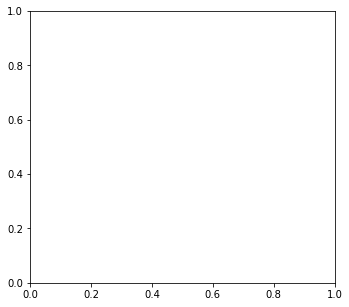

In [36]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
norte.plot(column='PER_PESSate1ano', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "Percentual de pessoas de até 1 ano de idade sem registro de nascimento ", 'shrink': 0.7})
plt.title('Percentual de pessoas de até 1 ano de idade sem registro de nascimento  por município do Brasil') 

NameError: name 'nordeste' is not defined

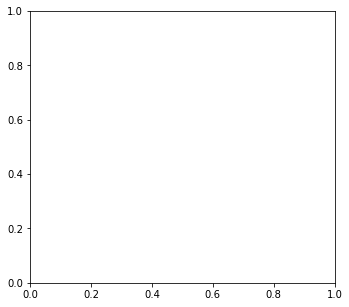

In [37]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
nordeste.plot(column='PER_PESSate1ano', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "Percentual de pessoas de até 1 ano de idade sem registro de nascimento ", 'shrink': 0.7})
plt.title('Percentual de pessoas de até 1 ano de idade sem registro de nascimento  por município do Brasil') 

NameError: name 'centrooeste' is not defined

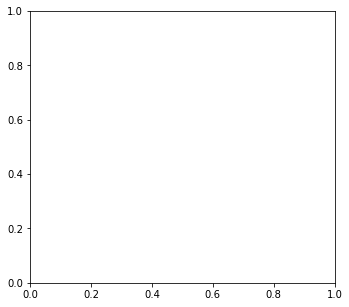

In [38]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
centrooeste.plot(column='PER_PESSate1ano', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "Percentual de pessoas de até 1 ano de idade sem registro de nascimento ", 'shrink': 0.7})
plt.title('Percentual de pessoas de até 1 ano de idade sem registro de nascimento  por município do Brasil') 

NameError: name 'sudeste' is not defined

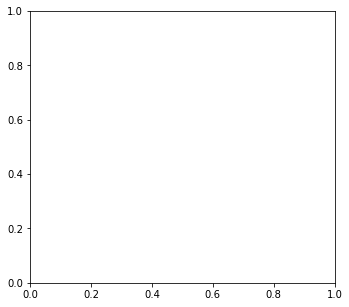

In [39]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sudeste.plot(column='PER_PESSate1ano', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "Percentual de pessoas de até 1 ano de idade sem registro de nascimento ", 'shrink': 0.7})
plt.title('Percentual de pessoas de até 1 ano de idade sem registro de nascimento  por município do Brasil') 

NameError: name 'sul' is not defined

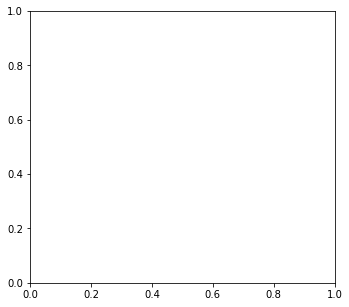

In [40]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sul.plot(column='PER_PESSate1ano', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "Percentual de pessoas de até 1 ano de idade sem registro de nascimento ", 'shrink': 0.7})
plt.title('Percentual de pessoas de até 1 ano de idade sem registro de nascimento  por município do Brasil') 